In [322]:
!pip install xgboost

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [326]:
df = pd.read_csv("Cancer_Data.csv")
df.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

In [328]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df.columns

In [330]:
df.drop(columns = ['Unnamed: 32', 'id'],axis=1, inplace = True)

In [332]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [334]:
print(df.head(4))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53     

In [336]:
# print(df.isnull())
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


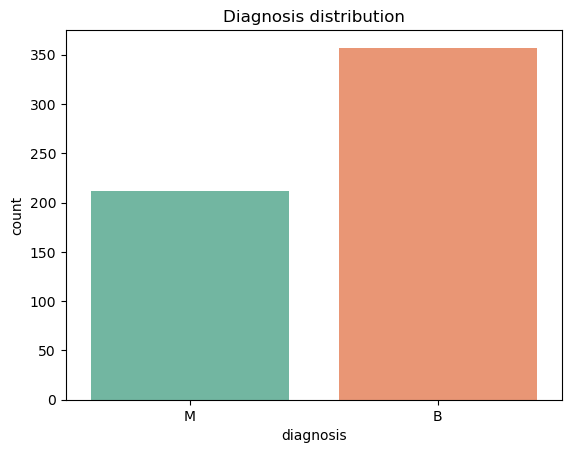

In [338]:
# Analyzing the target variable

sns.countplot(x = 'diagnosis', hue ='diagnosis', data = df, palette= 'Set2', legend = False)
plt.title('Diagnosis distribution')

plt.show()

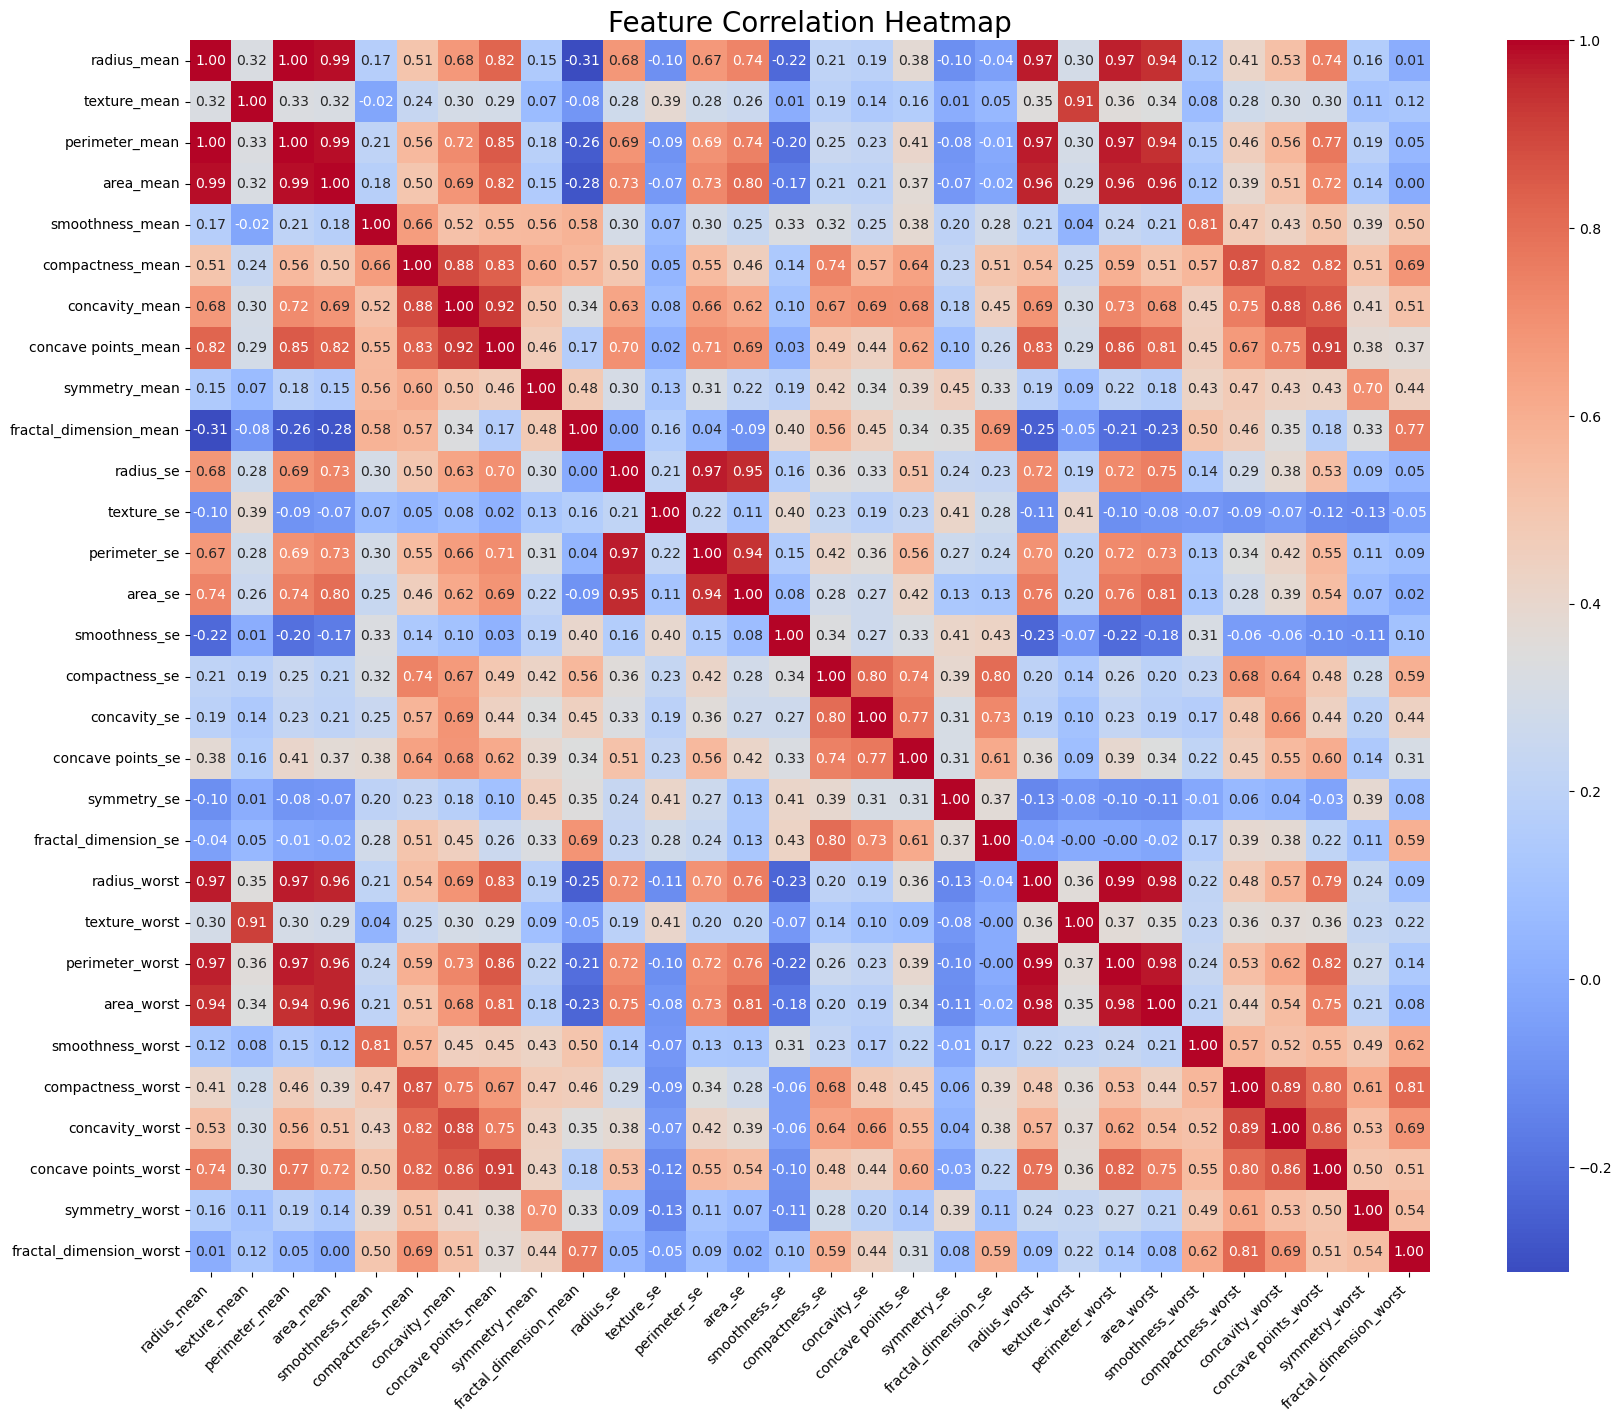

In [340]:
# finding out the correlation between the fetaures
# plotting the heatmap of correlation between features
plt.figure(figsize = (20,16))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap ="coolwarm", fmt = ".2f")
plt.title("Feature Correlation Heatmap", fontsize = 20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

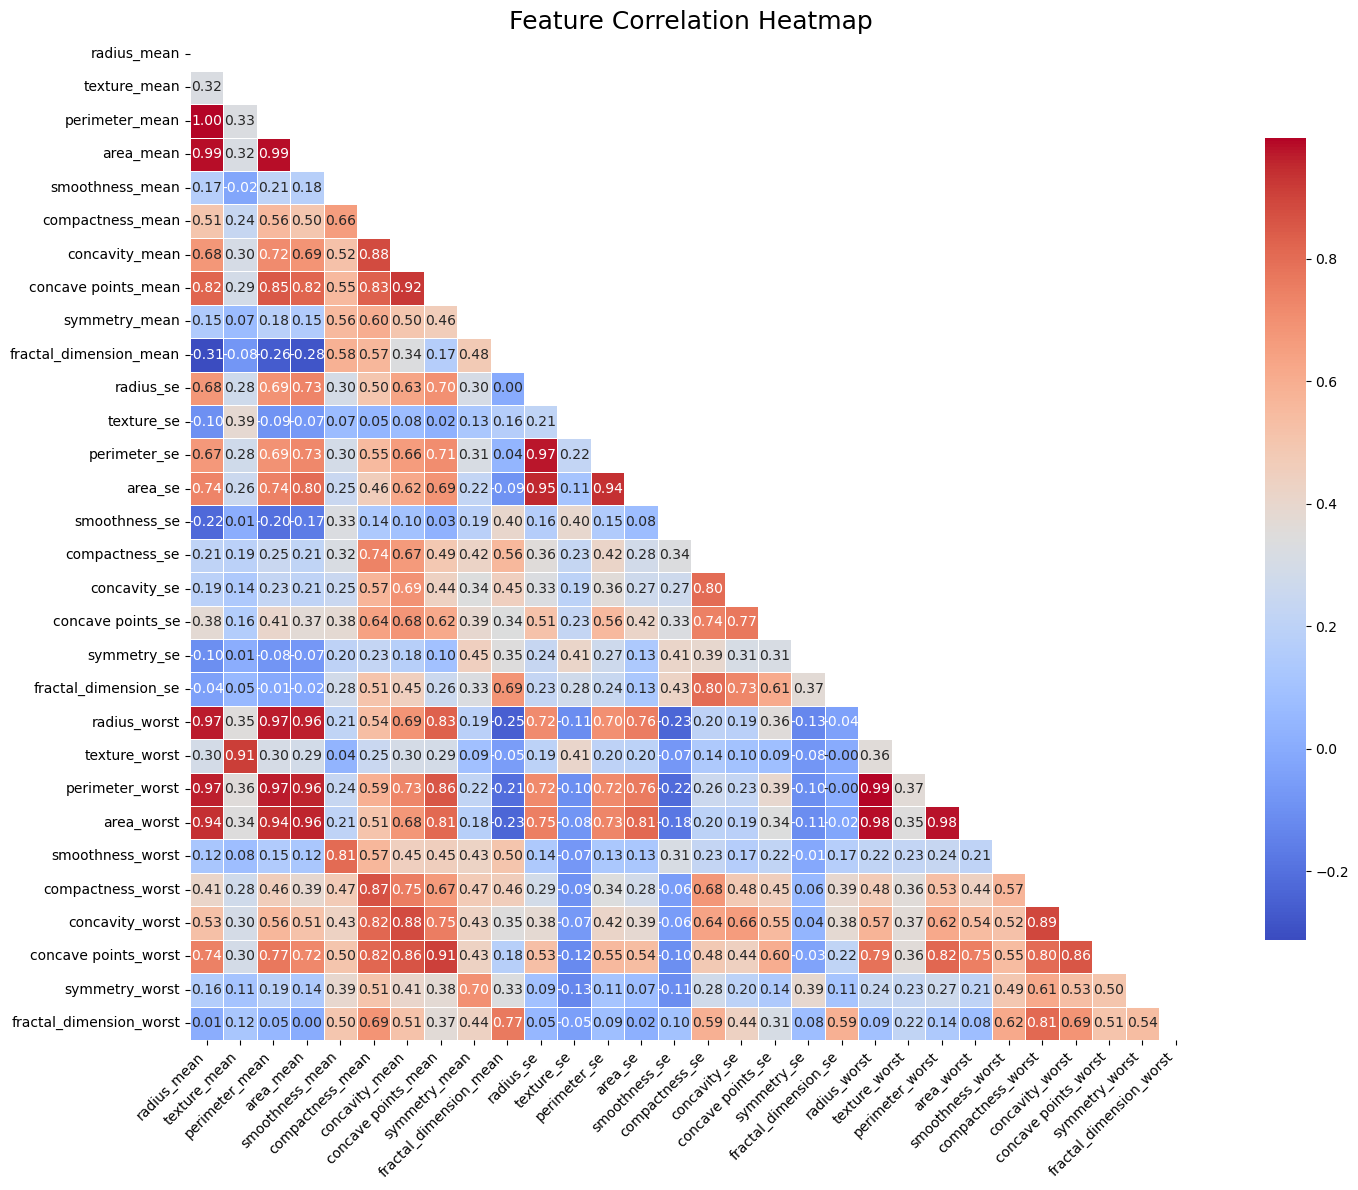

In [342]:
plt.figure(figsize=(16, 12))  # Bigger figure
correlation_matrix = df.select_dtypes(include='number').corr()

# Use a mask to show only one triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": .8})

plt.title("Feature Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


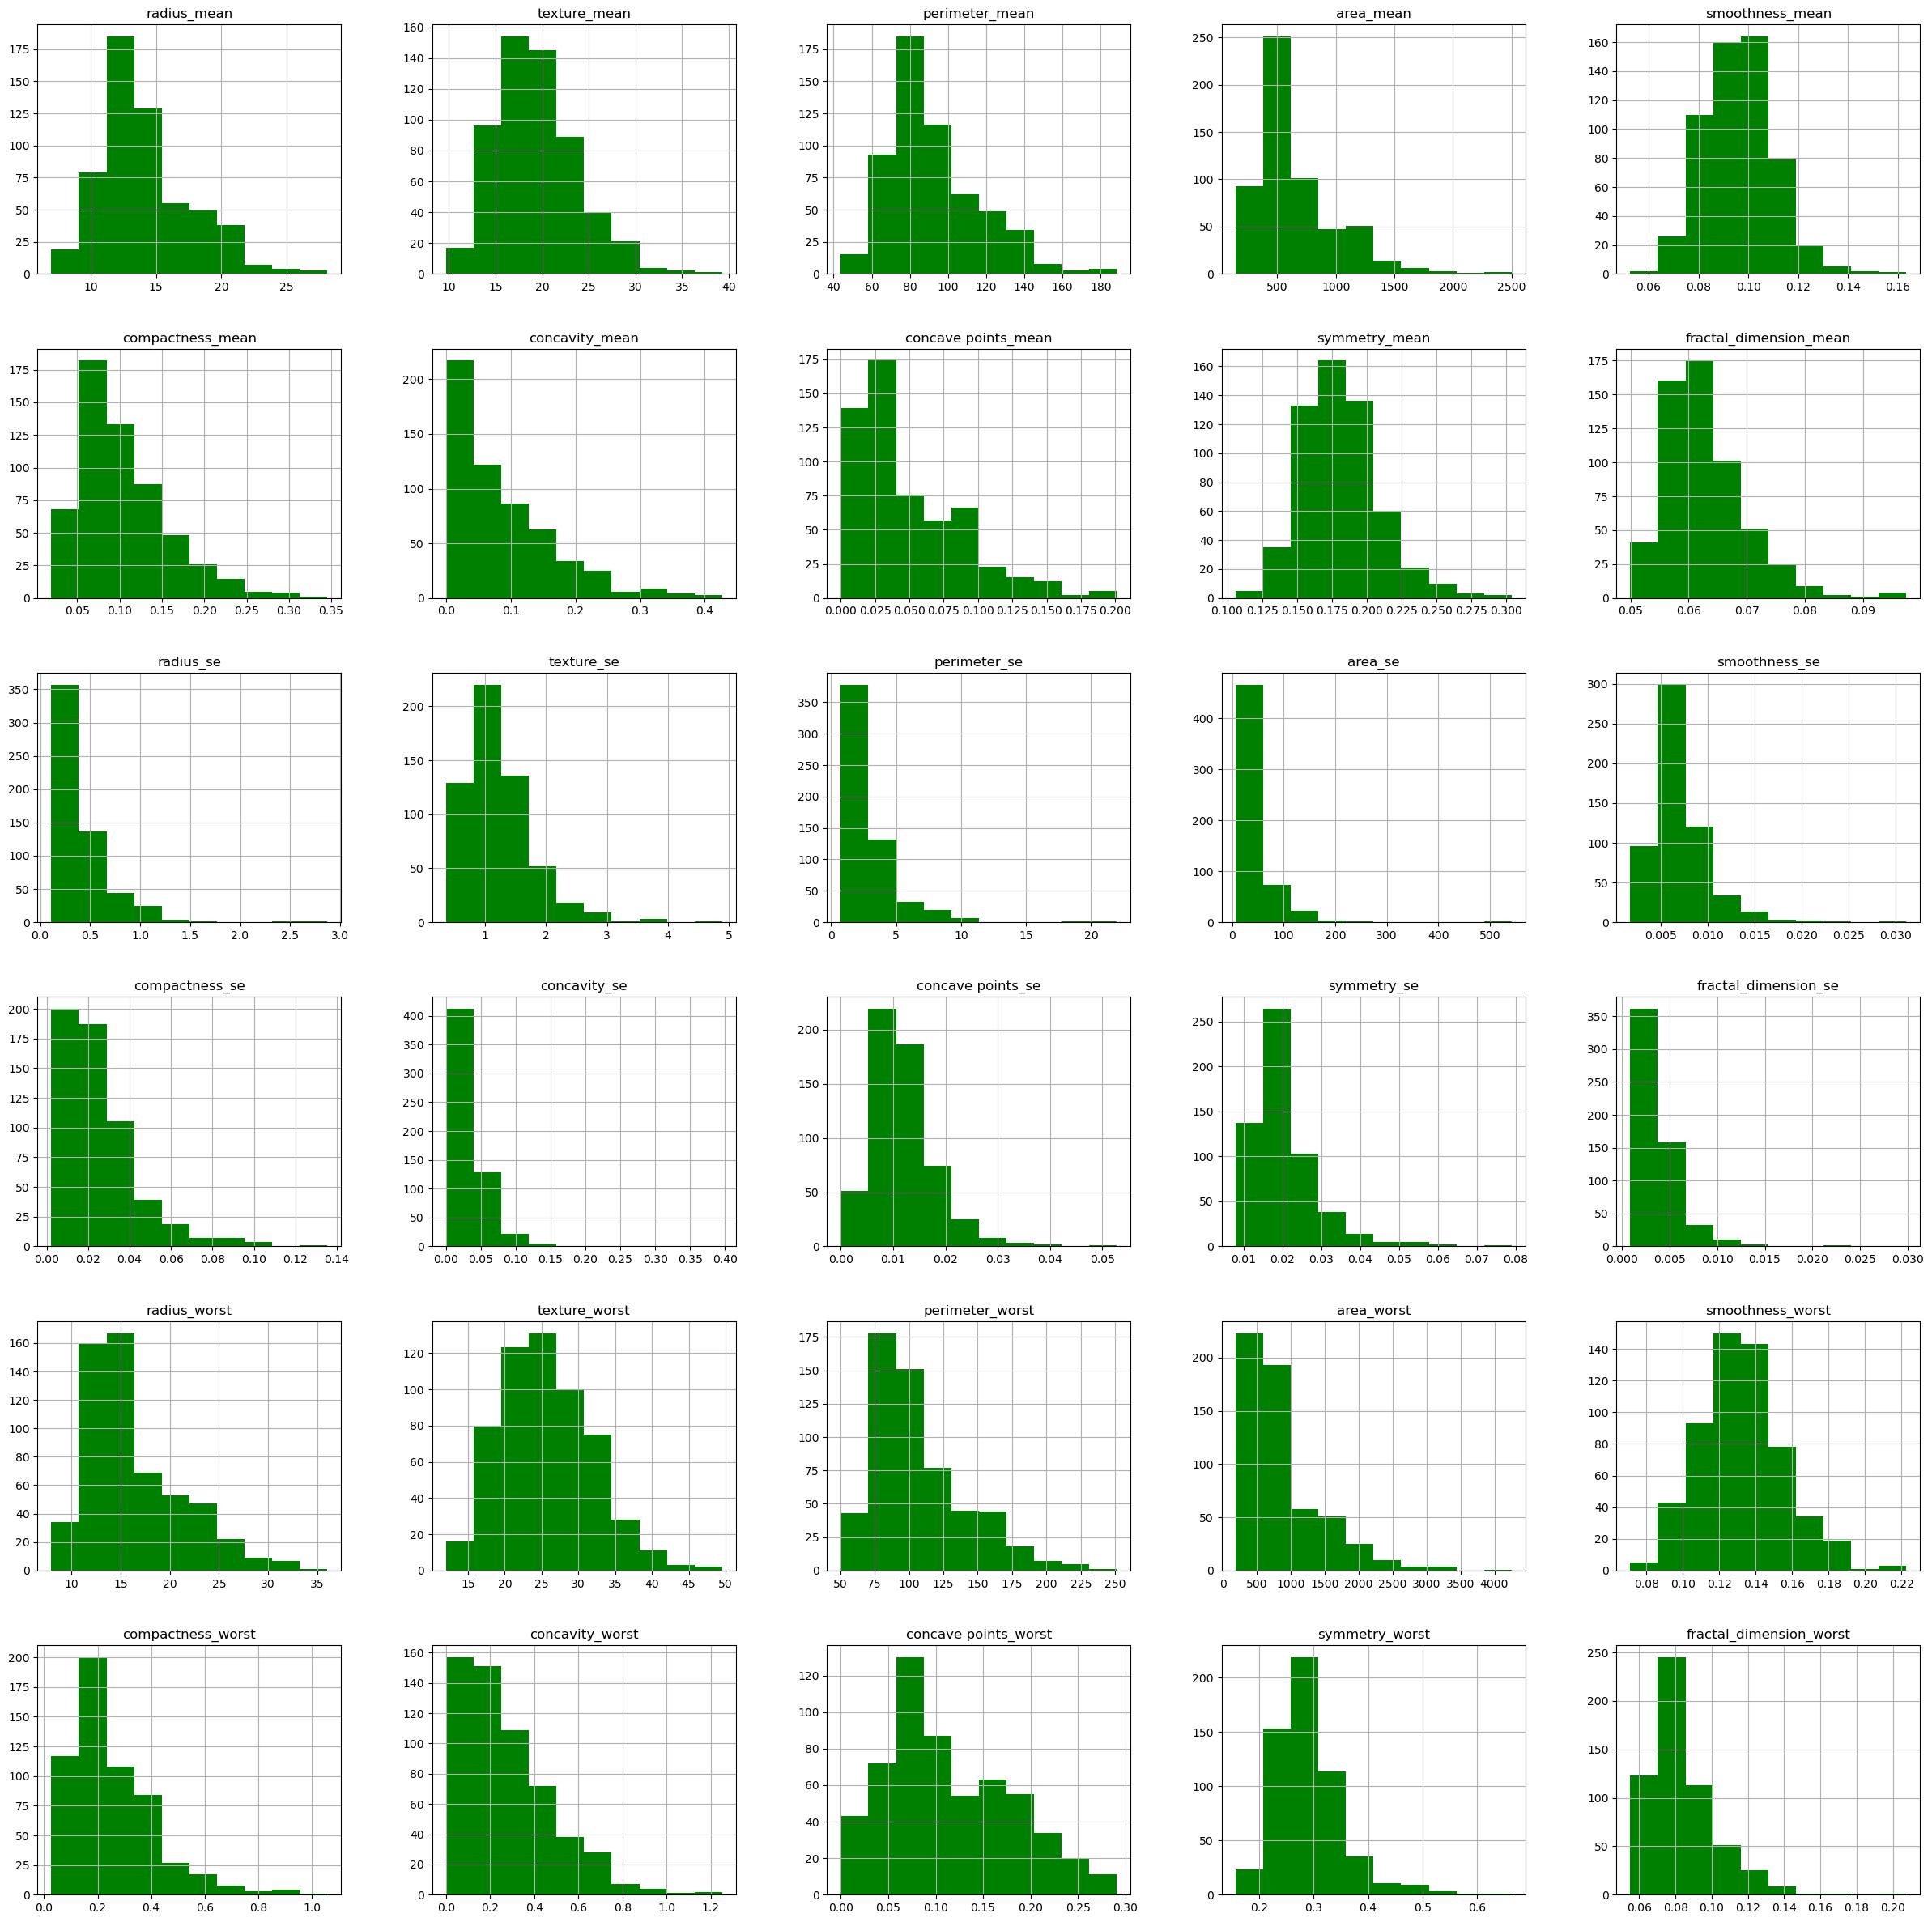

In [344]:
# plot the histograms for each feature

df.hist(figsize = (30,30), color = 'green')
plt.show()

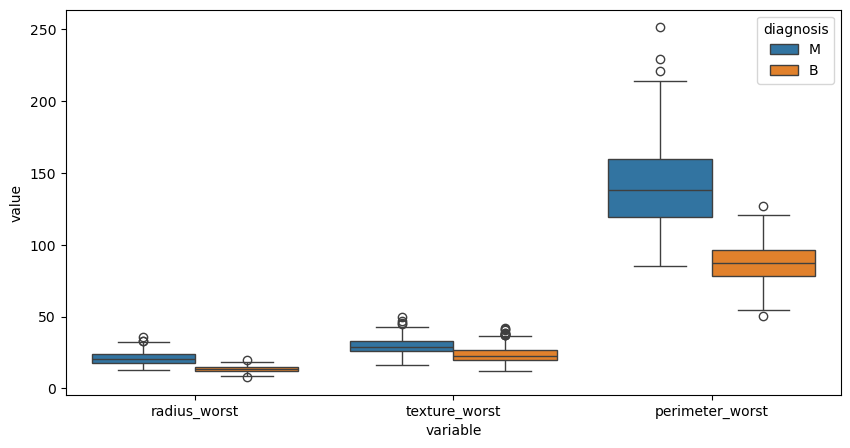

In [346]:
melted_data = pd.melt(df, id_vars = 'diagnosis', value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])

plt.figure(figsize = (10,5))

sns.boxplot(x = 'variable', y = 'value', hue = 'diagnosis', data = melted_data )

plt.show()

In [ ]:
df.columns

In [348]:
from IPython.display import display, HTML
data = df.describe().T

html = data.to_html()
scrollable = f'<div style="height:300px; overflow:auto; border:1px solid #ccc;">{html}</div>'

# Display
display(HTML(scrollable))

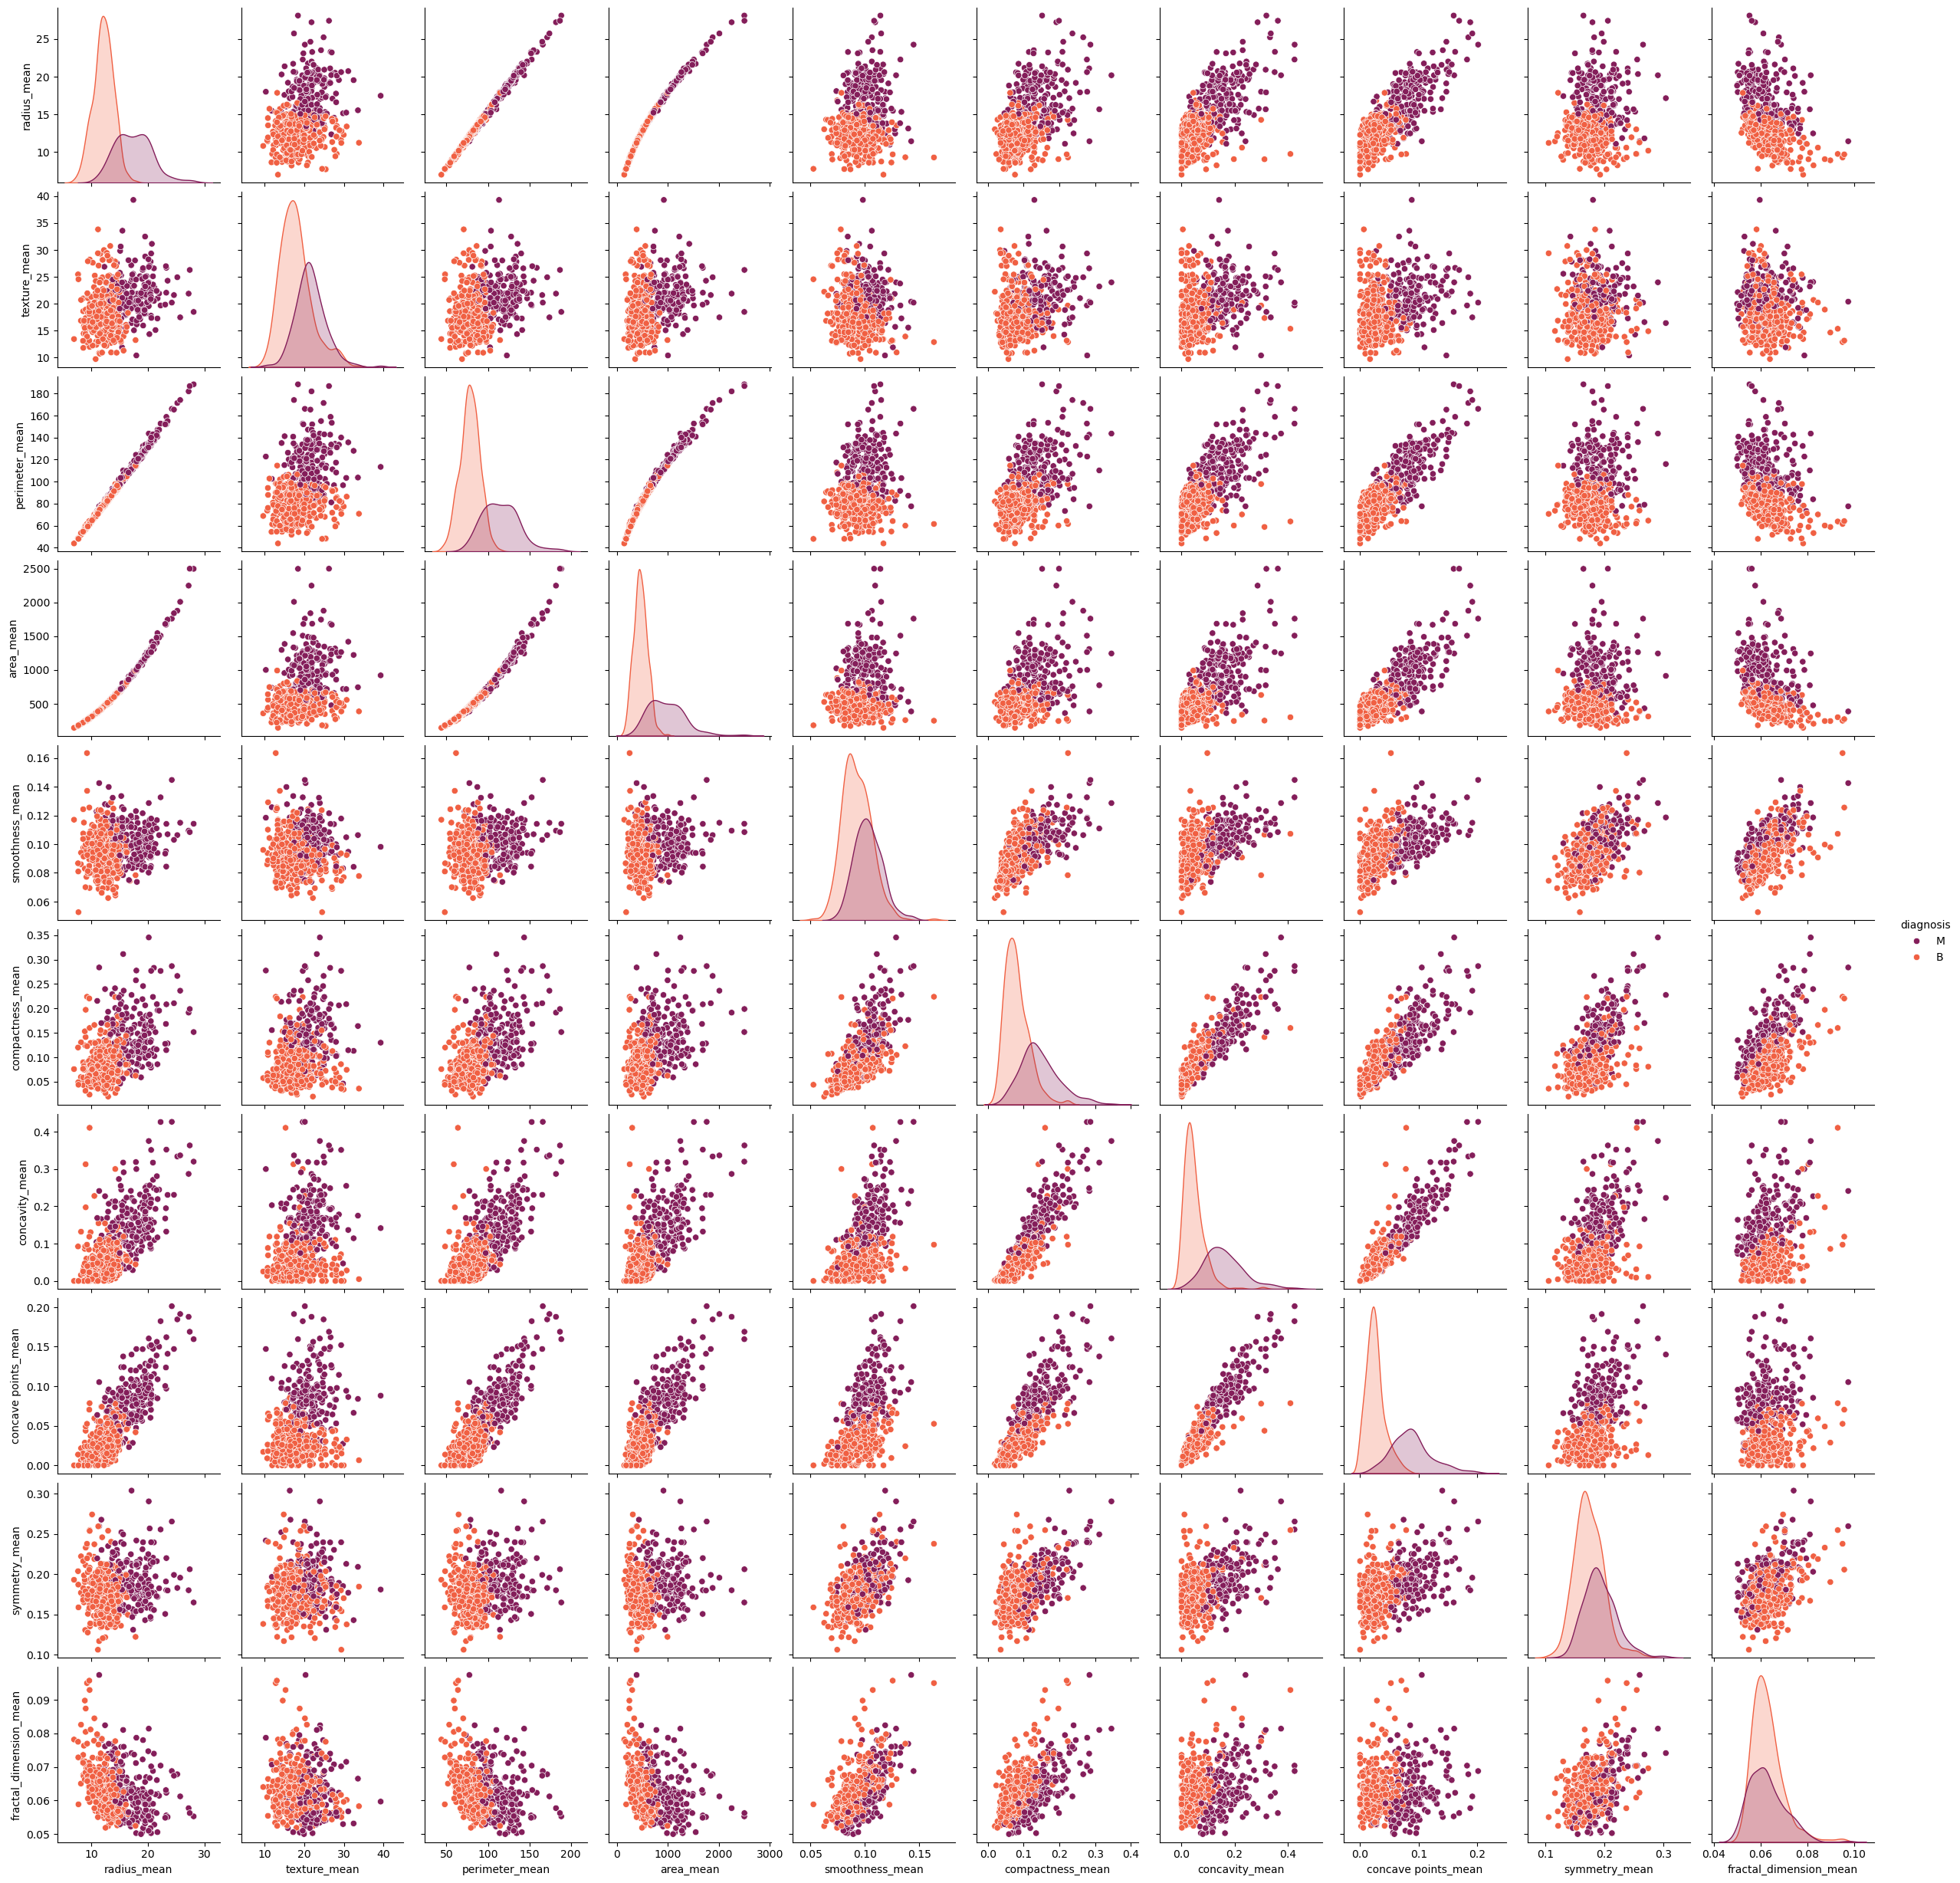

In [355]:
# generate a scatter plot with the following columns:

col = ['diagnosis' ,'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']

sns.pairplot(data = df[col], hue = 'diagnosis', palette = 'rocket')

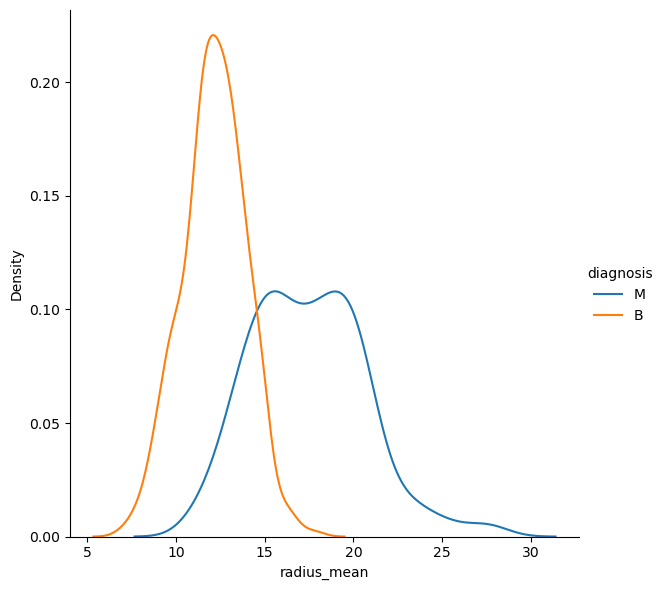

In [354]:
sns.FacetGrid(df, hue = 'diagnosis', height = 6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

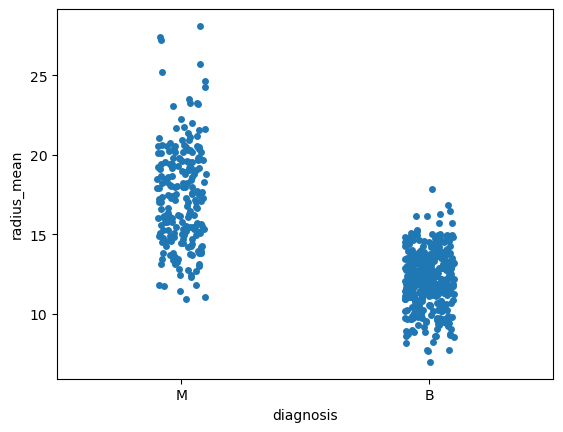

In [357]:
sns.stripplot(x = 'diagnosis', y = 'radius_mean', data = df, jitter = True, edgecolor = "orange")
plt.show()

In [362]:
# from the correlation matrix we got to know that these columns are highly correlted with
# radius_mean,perimeter, area_columns.

# So we are dropping these columns:

# first let us drop all "worst" columns

col = ['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

df = df.drop(col, axis = 1)

# then, drop all columns related to the perimeter and area attributes

columns = ['perimeter_mean',
           'perimeter_se',
           'area_mean',
           'area_se'
          ]

df = df.drop(columns, axis = 1) 


# now drop all cols related to concavity and concave points attributes
cols = ['concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se'
       ]
df = df.drop(cols, axis = 1)



In [364]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

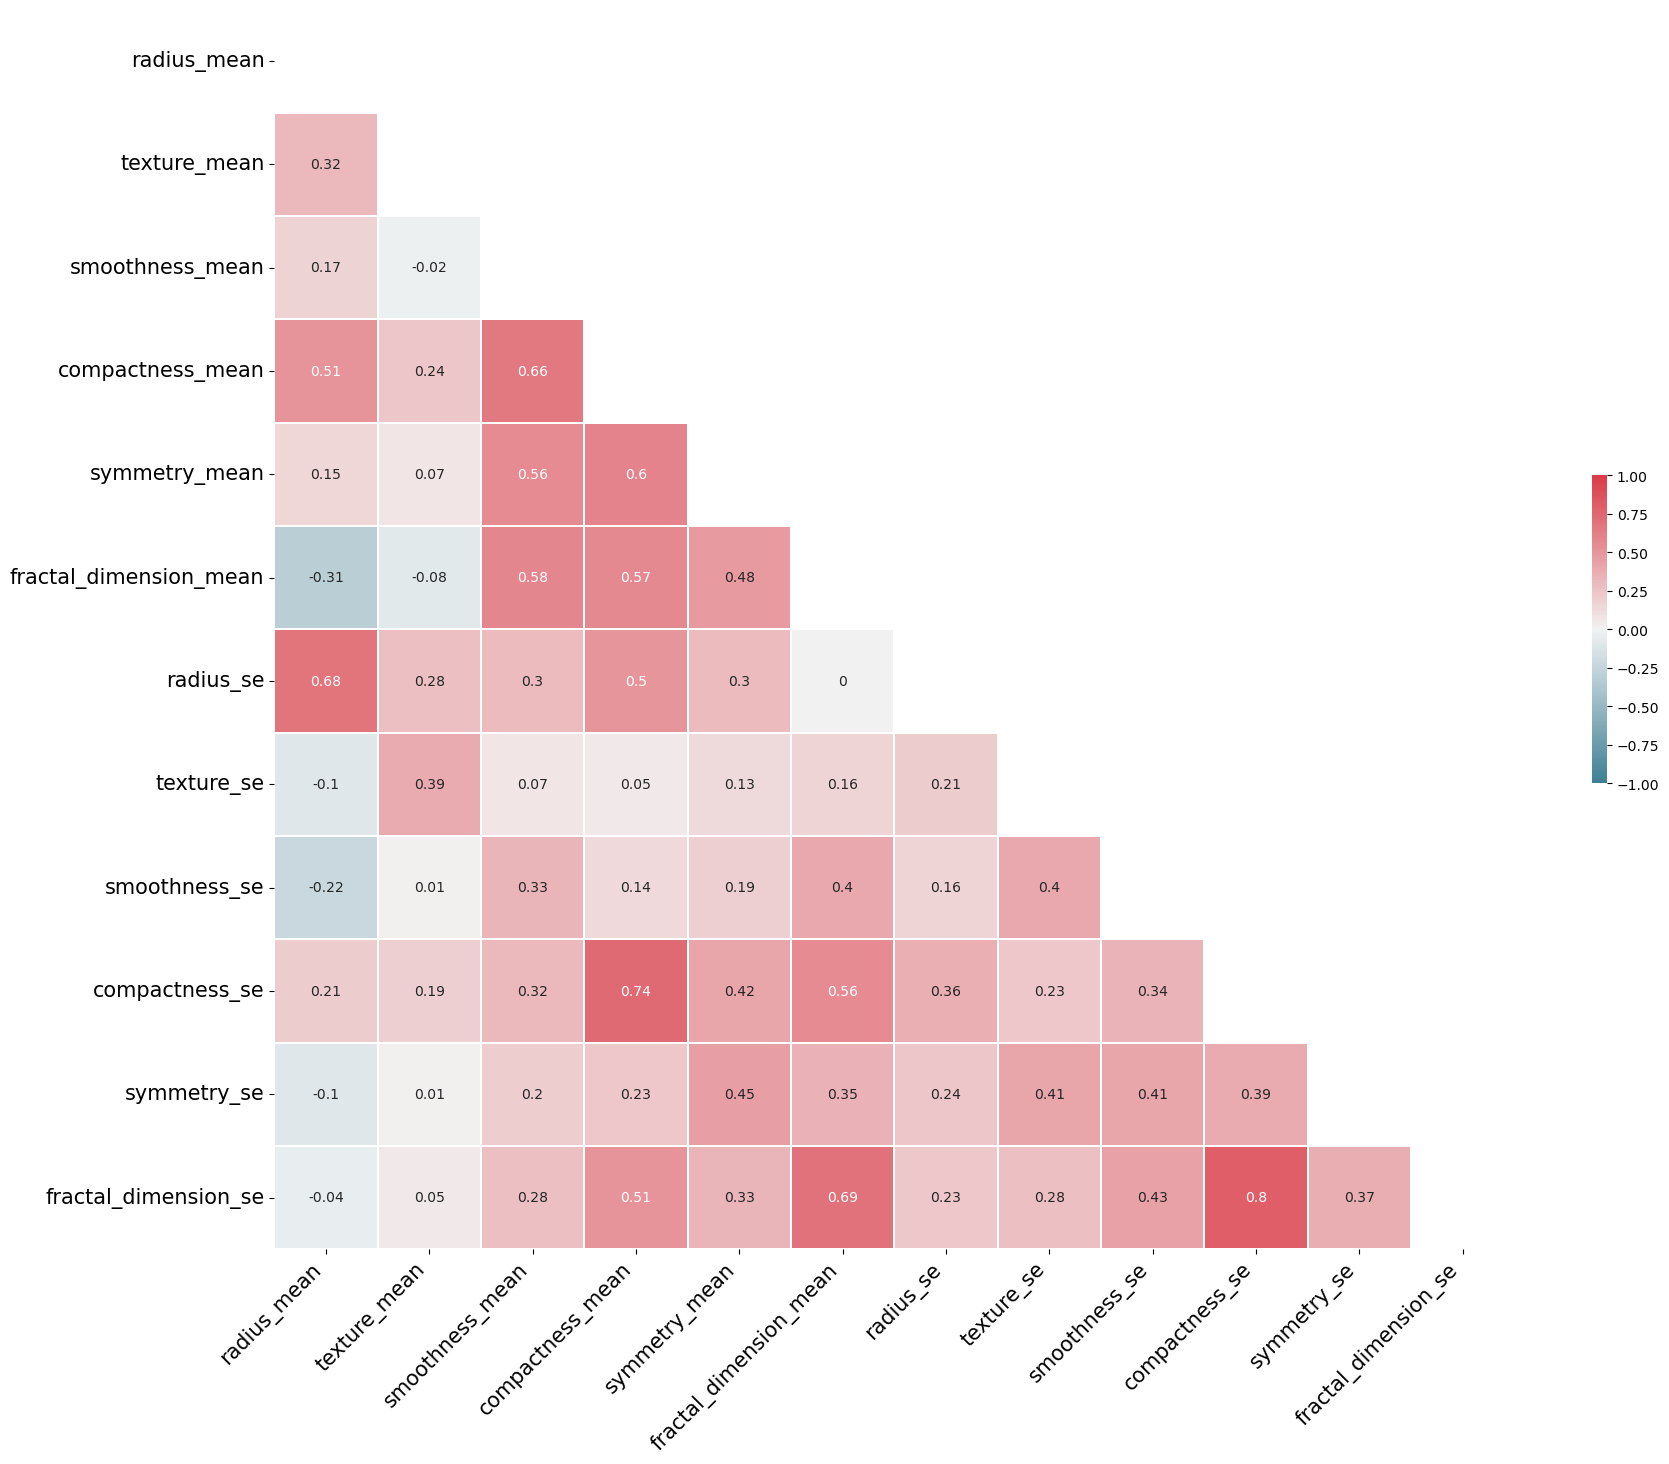

<Figure size 640x480 with 0 Axes>

In [366]:
cor = df.select_dtypes(include= 'number').corr().round(2)

# Define a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a mask for the upper triangle
mask = np.zeros_like(cor, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(cor, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .2}, annot=True)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.tight_layout()
plt.show()

In [368]:
scaler = StandardScaler()

features = df.drop(columns = ['diagnosis'])
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

df_scaled['diagnosis'] = df['diagnosis'].values

In [370]:
x = df_scaled.drop(columns = ['diagnosis'])
y = df_scaled['diagnosis']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

print(f"Training set shape: {x_train.shape}, Test set shape: {x_test.shape}")

Training set shape: (455, 12), Test set shape: (114, 12)


In [372]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, )
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           B       0.90      0.96      0.93        72
           M       0.92      0.81      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



In [374]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classificaion Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9122807017543859
Confusion Matrix:
 [[68  4]
 [ 6 36]]
Classificaion Report:
               precision    recall  f1-score   support

           B       0.92      0.94      0.93        72
           M       0.90      0.86      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



Another way of Training

In [376]:
# Spliting target variable and independent variables
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
print("Size of training set:", x_train.shape)
print("Size of training set:", x_test.shape)

Size of training set: (398, 12)
Size of training set: (171, 12)


In [384]:
rf = RandomForestClassifier()

parameters = {'n_estimators': [10, 15],
             'max_features': [ 'sqrt'],
             'criterion': ['gini'],
             'max_depth': [3, 5],
             'min_samples_split': [2],
             'min_samples_leaf': [1]
             }

# run the grid search

grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# train the model using the training sets
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [388]:
# Prediction on test data
y_pred = rf.predict(x_test)

In [390]:
from sklearn import metrics
# calculating the accuracy

acc_rf = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

print('Accuracy of Random Forest Model: ', acc_rf)

Accuracy of Random Forest Model:  92.4


In [396]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [400]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(x_train,y_train)

SVC(C=1000, gamma=0.001)

In [404]:
# Prediction on test data
y_pred = svc.predict(x_test)

In [406]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  91.81
